In [52]:
# Import relevant packages

import pandas as pd
import matplotlib.pyplot as plt
import numpy as np
import statistics
from scipy import stats
import seaborn as sns
import geopandas
#import datetime 
import math
from ipywidgets import interact, interactive, fixed, interact_manual
import ipywidgets as widgets

# Load relevant data

# camels catchment attributes
hydro = pd.read_csv('data/camels_hydro.txt', sep=";", header=0)
geo = pd.read_csv('data/camels_geol.txt', sep=";", header=0)
clim = pd.read_csv('data/camels_clim.txt', sep=";", header=0)
soil = pd.read_csv('data/camels_soil.txt', sep=";", header=0)
veg = pd.read_csv('data/camels_vege.txt', sep=";", header=0)
topo = pd.read_csv('data/camels_topo.txt', sep=";", header=0)
name =  pd.read_csv('data/camels_name.txt', sep=";", header=0)

# load the relevant shapefile
states = geopandas.read_file('shapefiles/usa-states-census-2014.shp')

# Hydrology
hydro_q_mean = pd.Series.tolist(hydro.q_mean) 
hydro_runoff_ratio = pd.Series.tolist(hydro.runoff_ratio) # 
hydro_slopeFDC = pd.Series.tolist(hydro.slope_fdc)
hydro_baseflow_index = pd.Series.tolist(hydro.baseflow_index)
hydro_Q_elas = pd.Series.tolist(hydro.stream_elas)
hydro_dry_freq = pd.Series.tolist(hydro.zero_q_freq)
hydro_low_flow = pd.Series.tolist(hydro.q5)
hydro_high_flow = pd.Series.tolist(hydro.q95)

# Soils
soil_depth = soil.soil_depth_statsgo
soil_porosity = soil.soil_porosity
soil_conductivity = soil.soil_conductivity
soil_sand_frac = soil.sand_frac
soil_silt_frac = soil.silt_frac
soil_clay_frac = soil.clay_frac

# Topography
lat = topo.gauge_lat
lon = topo.gauge_lon
topo_elevation = topo.elev_mean
topo_slope = topo.slope_mean
topo_area = topo.area_gages2

# Climate
clim_precip_mean = clim.p_mean
clim_PET_mean = clim.pet_mean
clim_P_seasonality = clim.p_seasonality
clim_frac_snow= clim.frac_snow
clim_aridity = clim.aridity
clim_high_P_freq = clim.high_prec_freq
clim_low_P_freq = clim.low_prec_freq

# Vegetation
veg_frac_forest = veg.frac_forest
veg_lai_max= veg.lai_max
veg_lai_diff= veg.lai_diff
veg_gfv_max= veg.gvf_max
veg_gfv_diff= veg.gvf_diff
veg_root_depth_50= veg.root_depth_50
veg_root_depth_99= veg.root_depth_99

frames = [soil, topo, clim, veg]
result = pd.concat(frames)

# Geology
geo_first_class = geo.geol_1st_class
geo_second_class = geo.geol_2nd_class
geo_carbonate_rocks_frac = geo.carbonate_rocks_frac
geo_permeability = geo.geol_permeability

In [2]:
#veg   =  [veg_frac_forest,  veg_lai_max,  veg_lai_diff,  veg_gfv_max,  veg_gfv_diff, 
#          veg_root_depth_50,  veg_root_depth_99]
#hydro1 =  [hydro_q_mean, hydro_runoff_ratio, hydro_slopeFDC, hydro_baseflow_index, 
#          hydro_Q_elas, hydro_dry_freq, hydro_low_flow, hydro_high_flow]

interactive(children=(Dropdown(description='variable', options=('gauge_id', 'q_mean', 'runoff_ratio', 'slope_f…

<function __main__.map_maker(variable, min_fac, max_fac)>

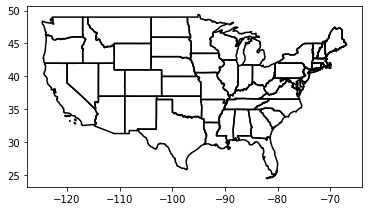

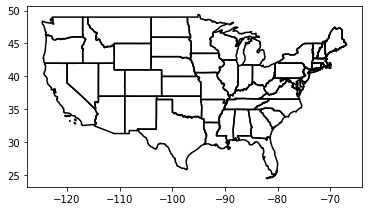

In [3]:
## Scatter plots with stats

# Make a map of a variable
def map_maker(variable,min_fac,max_fac):
    states.boundary.plot(color='black')
    cm=plt.get_cmap('jet') # choses color based on these options: https://matplotlib.org/stable/tutorials/colors/colormaps.html 
    #sc = plt.scatter(lon, lat, c=float(variable[1:len(variable)]),  vmin=min(variable), vmax=max(variable), s=10, cmap=cm)
    sc = plt.scatter(lon, lat, c=variable,  vmin=min(variable)*min_fac, vmax=max(variable)*max_fac, s=10, cmap=cm)
    #plt.colorbar(sc)
    cbar = plt.colorbar(sc)
    cbar.set_label('variable', rotation=270)
    plt.xlim(-127, -67)
    plt.ylim(24, 50)
    plt.figure(figsize =(20, 10))
    plt.show()
    

widgets.interact(map_maker,variable = hydro,
                min_fac = (1,3,0.1), max_fac = (0,2,0.1))


In [4]:
def run_histogram(variable,bin_count):
    ## Python example
    fig = plt.figure(figsize =(5, 3))
     # Creating axes instance
    ax = fig.add_axes([0, 0, 1, 1])
    # Creating plot
    plt.hist(variable, bins=bin_count, alpha=0.5)
    # adding labels
    ax.set_xlabel('variable of interest')
    ax.set_ylabel('Count')
    # show plot
    plt.show()
    
widgets.interact(run_histogram,variable = hydro, bin_count=(1,50,1))

interactive(children=(Dropdown(description='variable', options=('gauge_id', 'q_mean', 'runoff_ratio', 'slope_f…

<function __main__.run_histogram(variable, bin_count)>

In [32]:
def run_scatter(variable_x,variable_y,log_x_on,log_y_on):
    ## Python example
    print(hydro.variable_x)
    variable_Y = hydro.variable_y


    fig = plt.figure(figsize =(5, 3))
     # Creating axes instance
    ax = fig.add_axes([0, 0, 1, 1])
    # Creating plot
    plt.scatter(variable_X, variable_Y)
    # adding labels
    ax.set_xlabel('variable_x')
    ax.set_ylabel('variable_y')
    # show plot
    
    #linear_model=np.polyfit(variable_x,variable_y,1)
    #linear_model_fn=np.poly1d(linear_model)
    #x_s=np.arange(min(variable_x),max(variable_x))
    #plt.plot(x_s,linear_model_fn(x_s),color="green")
    
    if log_x_on =="Yes": 
        plt.xscale("log")
        
    if log_y_on =="Yes": 
        plt.yscale("log")
        
    plt.show()

    
    #print(stats.spearmanr(variable_x,variable_y))
    #print(stats.pearsonr(variable_x,variable_y))

widgets.interact(run_scatter,variable_x = hydro,
                             variable_y = hydro,
                             log_x_on = ["No","Yes"],
                             log_y_on = ["No","Yes"])
    

interactive(children=(Dropdown(description='variable_x', options=('gauge_id', 'q_mean', 'runoff_ratio', 'slope…

<function __main__.run_scatter(variable_x, variable_y, log_x_on, log_y_on)>

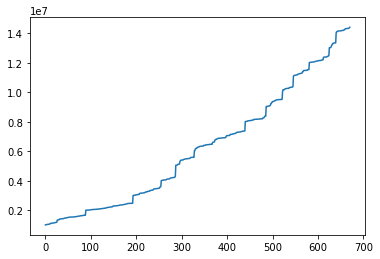

In [8]:
plt.plot(hydro.gauge_id)

In [51]:
def run_scatter(variable_x,variable_y,log_x_on,log_y_on):
    
    ## Python example
    X = hydro[variable_x]
    Y = all[variable_y]

    fig = plt.figure(figsize =(5, 3))
     # Creating axes instance
    ax = fig.add_axes([0, 0, 1, 1])
    # Creating plot
    plt.scatter(X, Y)
    # adding labels
    ax.set_xlabel('variable_x')
    ax.set_ylabel('variable_y')
    # show plot
    
    #linear_model=np.polyfit(variable_x,variable_y,1)
    #linear_model_fn=np.poly1d(linear_model)
    #x_s=np.arange(min(variable_x),max(variable_x))
    #plt.plot(x_s,linear_model_fn(x_s),color="green")
    
    if log_x_on =="Yes": 
        plt.xscale("log")
        
    if log_y_on =="Yes": 
        plt.yscale("log")
        
    plt.show()
    
    #print(stats.spearmanr(variable_x,variable_y))
    #print(stats.pearsonr(variable_x,variable_y))

widgets.interact(run_scatter,variable_x = hydro,
                             variable_y = hydro,
                             log_x_on = ["No","Yes"],
                             log_y_on = ["No","Yes"])

    #variable_Y = hydro.variable_y
    
widgets.interact(run_scatter,variable_x = hydro,
                             variable_y = hydro,
                             log_x_on = ["No","Yes"],
                             log_y_on = ["No","Yes"])

interactive(children=(Dropdown(description='variable_x', options=('gauge_id', 'q_mean', 'runoff_ratio', 'slope…

interactive(children=(Dropdown(description='variable_x', options=('gauge_id', 'q_mean', 'runoff_ratio', 'slope…

<function __main__.run_scatter(variable_x, variable_y, log_x_on, log_y_on)>

In [28]:
print(variable_x)

NameError: name 'variable_x' is not defined

In [43]:
print(hydro.gauge_id)

0       1013500
1       1022500
2       1030500
3       1031500
4       1047000
         ...   
666    14309500
667    14316700
668    14325000
669    14362250
670    14400000
Name: gauge_id, Length: 671, dtype: int64


In [48]:
print(hydro["q_mean"])

0      1.699155
1      2.173062
2      1.820108
3      2.030242
4      2.182870
         ...   
666    2.457700
667    2.925937
668    4.072283
669    0.332015
670    7.568103
Name: q_mean, Length: 671, dtype: float64


In [53]:
print(result)

     gauge_id  soil_depth_pelletier  soil_depth_statsgo  soil_porosity  \
0     1013500              7.404762            1.248408       0.461149   
1     1022500             17.412808            1.491846       0.415905   
2     1030500             19.011414            1.461363       0.459091   
3     1031500              7.252557            1.279047       0.450236   
4     1047000              5.359655            1.392779       0.422749   
..        ...                   ...                 ...            ...   
666  14309500                   NaN                 NaN            NaN   
667  14316700                   NaN                 NaN            NaN   
668  14325000                   NaN                 NaN            NaN   
669  14362250                   NaN                 NaN            NaN   
670  14400000                   NaN                 NaN            NaN   

     soil_conductivity  max_water_content  sand_frac  silt_frac  clay_frac  \
0             1.106522           